## Chipotle analysis
- top10 menu
- menu count
- each menu count

## initial steps


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
df = pd.read_csv('07.chipotle.tsv', sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
# 전처리
#item_price 에서 $ 빼기
df['item_price']=df['item_price'].str.replace('$','').astype(float)
df.head()

#df['item_price] = df['item_price].str.strip($)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [ ]:
x = df['item_name'].unique()
x

In [ ]:
# 전처리
#item name 에서 - 빼기
df['item_name']=df['item_name'].str.replace('-',' ')

In [ ]:
x = df['item_name'].unique()
len(x)

47

In [ ]:
# top10 menu
df['item_name'].value_counts()[:10] #series
# df['item_name'].value_counts().head(10)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [ ]:
df2 = df.groupby(['item_name']).count().sort_values('quantity', ascending = False)
df3 = df2[0:10]
df3

In [ ]:
df.groupby(['item_name']).sum().sort_values('quantity', ascending = False)


In [ ]:
x = df['item_name'].unique()
len(x)

47

In [ ]:
# quantity by menu
a = df.groupby('item_name').sum()
a.head()


,order_id,quantity,item_price
item_name,,,
6 Pack Soft Drink,52322,55,356.95
Barbacoa Bowl,53972,66,672.36
Barbacoa Burrito,74718,91,894.75
Barbacoa Crispy Tacos,5613,12,120.21
Barbacoa Salad Bowl,9708,10,106.40


In [ ]:
a['each_price'] = a['item_price']/a['quantity']


In [ ]:
a[:10]

## detailed_menu: item_names + choice_description

In [ ]:
import numpy as np

df['choice_description']=df['choice_description'].replace(np.nan,'no choice').astype(str)

In [ ]:
type(df['choice_description'].iloc[3])

str

In [ ]:
df['detailed_menu'] = df['item_name'] +' / '+ df['choice_description']
df

,order_id,quantity,item_name,choice_description,item_price,detailed_menu
0,1,1,Chips and Fresh Tomato Salsa,no choice,2.39,Chips and Fresh Tomato Salsa / no choice
1,1,1,Izze,[Clementine],3.39,Izze / [Clementine]
2,1,1,Nantucket Nectar,[Apple],3.39,Nantucket Nectar / [Apple]
3,1,1,Chips and Tomatillo Green Chili Salsa,no choice,2.39,Chips and Tomatillo Green Chili Salsa / no choice
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,Chicken Bowl / [Tomatillo-Red Chili Salsa (Hot...
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,"Steak Burrito / [Fresh Tomato Salsa, [Rice, Bl..."
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,"Steak Burrito / [Fresh Tomato Salsa, [Rice, So..."
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,"Chicken Salad Bowl / [Fresh Tomato Salsa, [Faj..."
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,"Chicken Salad Bowl / [Fresh Tomato Salsa, [Faj..."


In [ ]:
#df.drop(columns=['detailed menu'])

In [ ]:
df_x.head(20)

0                                             no choice
1                                          [Clementine]
2                                               [Apple]
3                                             no choice
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
5     [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...
6                                             no choice
7     [Tomatillo Red Chili Salsa, [Fajita Vegetables...
8     [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...
9     [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...
10                                            no choice
11    [Roasted Chili Corn Salsa, [Fajita Vegetables,...
12    [Roasted Chili Corn Salsa, [Rice, Black Beans,...
13    [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...
14                                            no choice
15                                            no choice
16    [Tomatillo-Green Chili Salsa (Medium), [Pinto ...
17    [Fresh Tomato Salsa (Mild), [Black Beans, 

In [ ]:
b = df.groupby('detailed_menu').sum()
b['each_price'] = b['item_price']/b['quantity']
b

,order_id,quantity,item_price,each_price
detailed_menu,,,,
6 Pack Soft Drink / [Coke],19440,21,136.29,6.49
6 Pack Soft Drink / [Diet Coke],24539,25,162.25,6.49
6 Pack Soft Drink / [Lemonade],3056,2,12.98,6.49
6 Pack Soft Drink / [Nestea],1746,2,12.98,6.49
6 Pack Soft Drink / [Sprite],3541,5,32.45,6.49
...,...,...,...,...
"Veggie Soft Tacos / [Fresh Tomato Salsa, [Black Beans, Cheese, Sour Cream, Lettuce]]",322,1,8.75,8.75
"Veggie Soft Tacos / [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",688,1,11.25,11.25
"Veggie Soft Tacos / [Roasted Chili Corn Salsa (Medium), [Black Beans, Fajita Veggies, Cheese, Sour Cream, Lettuce]]",1132,1,8.49,8.49


In [ ]:
b.filter(like='Veggie Soft Tacos', axis=0)


,order_id,quantity,item_price,each_price
detailed_menu,,,,
"Veggie Soft Tacos / [Fresh Tomato Salsa (Mild), [Black Beans, Rice, Cheese, Lettuce]]",1559,2,16.98,8.49
"Veggie Soft Tacos / [Fresh Tomato Salsa (Mild), [Pinto Beans, Rice, Cheese, Sour Cream]]",567,1,8.49,8.49
"Veggie Soft Tacos / [Fresh Tomato Salsa, [Black Beans, Cheese, Sour Cream, Lettuce]]",322,1,8.75,8.75
"Veggie Soft Tacos / [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",688,1,11.25,11.25
"Veggie Soft Tacos / [Roasted Chili Corn Salsa (Medium), [Black Beans, Fajita Veggies, Cheese, Sour Cream, Lettuce]]",1132,1,8.49,8.49
"Veggie Soft Tacos / [Roasted Chili Corn Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Lettuce]]",948,1,8.75,8.75
"Veggie Soft Tacos / [Tomatillo Red Chili Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Guacamole, Lettuce]]",304,1,11.25,11.25


In [ ]:
b.filter(like = 'Chicken Bowl', axis = 0)

,order_id,quantity,item_price,each_price
detailed_menu,,,,
"Chicken Bowl / [Fresh Tomato (Mild), [Guacamole, Rice]]",1160,1,10.58,10.58
"Chicken Bowl / [Fresh Tomato (Mild), [Lettuce, Fajita Veggies, Black Beans, Rice, Sour Cream, Cheese]]",1237,1,8.19,8.19
"Chicken Bowl / [Fresh Tomato (Mild), [Lettuce, Fajita Veggies, Pinto Beans, Rice, Sour Cream, Cheese]]",1466,1,8.19,8.19
"Chicken Bowl / [Fresh Tomato (Mild), [Rice, Sour Cream, Cheese]]",1160,1,8.19,8.19
"Chicken Bowl / [Fresh Tomato Salsa (Mild), Cheese]",1271,1,8.49,8.49
...,...,...,...,...
"Chicken Bowl / [[Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, Fajita Veggies, Cheese, Sour Cream, Lettuce]]",726,1,8.49,8.49
"Chicken Bowl / [[Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium)], [Rice, Fajita Veggies, Guacamole, Lettuce]]",1567,1,10.98,10.98
"Chicken Bowl / [[Tomatillo-Green Chili Salsa (Medium), Tomatillo-Red Chili Salsa (Hot)], [Pinto Beans, Rice, Fajita Veggies, Cheese, Sour Cream, Guacamole]]",1470,1,10.98,10.98


## min price 

In [ ]:
df_one = df[df.quantity ==1]
df_one

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [ ]:
df_min = df_one.groupby('item_name').min('item_price')
df_min

In [ ]:
df_min = df_min.drop(columns=['order_id', 'quantity'])

In [ ]:
top_price = df_min.sort_values('item_price', ascending = False)
top_price['item_price'].mean() #$6.8
top_price

,item_price
item_name,
Barbacoa Salad Bowl,9.39
Steak Salad Bowl,9.39
Carnitas Salad Bowl,9.39
Carnitas Soft Tacos,8.99
Barbacoa Crispy Tacos,8.99
Barbacoa Soft Tacos,8.99
Steak Soft Tacos,8.99
Carnitas Bowl,8.99
Carnitas Crispy Tacos,8.99


## 이것저것


In [ ]:
df['item_name'].value_counts()[:10]

In [ ]:
df['choice_description'].count()

In [ ]:
df.head(20)

In [ ]:
df.groupby('item_name').count()

##  가장 큰 금액의 주문과 그 주문의 메뉴 개수

In [ ]:
order_df = df.groupby('order_id').sum()
order_df

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [ ]:
order_df.sort_values('item_price', ascending = False)

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
17,2,10.08
889,2,10.08
1014,2,10.08


In [ ]:
order_df.sort_values('quantity', ascending = False)

,quantity,item_price
order_id,,
1443,35,160.74
926,23,205.25
1786,20,114.30
1660,19,70.25
759,18,86.30
...,...,...
819,1,10.98
821,1,10.98
107,1,10.98


In [ ]:
k = order_df.sort_values('item_price', ascending = False)
k[:10]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
205,12,109.90
511,17,104.59
491,10,102.00
1449,11,95.39


In [ ]:
lst = k.index.to_list()
top_lst = lst[:10]
top_lst

[926, 1443, 1483, 691, 1786, 205, 511, 491, 1449, 759]

In [ ]:
#top_1 = df.query('order_id =="926"')
#top_1 = top1.groupby('item_name').count().sort_values('quantity', ascending = False)
#top_1
#top_lst = [926, 1443, 1483, 691, 1786, 205, 511, 491, 1449, 759]

#for i in top_lst:
#    df.query('order_id == "i"')
#    top_i = top_i.groupby('item_name').count().sort_values('quantity', ascending = False)
#    print(top_i)

In [ ]:
df.query('order_id == "926"')

In [ ]:
top_lst = [926, 1443, 1483, 691, 1786, 205, 511, 491, 1449, 759]
top_menu = df[df.order_id.isin(top_lst)]
re_top_10 = top_menu.groupby('item_name').count().sort_values('quantity', ascending = False)
re_top_10

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,31,31,31,31
Chicken Burrito,17,17,17,17
Steak Burrito,12,12,12,12
Steak Bowl,9,9,9,9
Carnitas Burrito,5,5,5,5
Chicken Salad Bowl,4,4,4,4
Canned Soft Drink,4,4,4,4
Veggie Bowl,3,3,3,3
Chips and Guacamole,3,3,0,3


In [ ]:
re_top_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Chicken Bowl to Barbacoa Crispy Tacos
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   order_id            22 non-null     int64
 1   quantity            22 non-null     int64
 2   choice_description  22 non-null     int64
 3   item_price          22 non-null     int64
dtypes: int64(4)
memory usage: 1.5+ KB


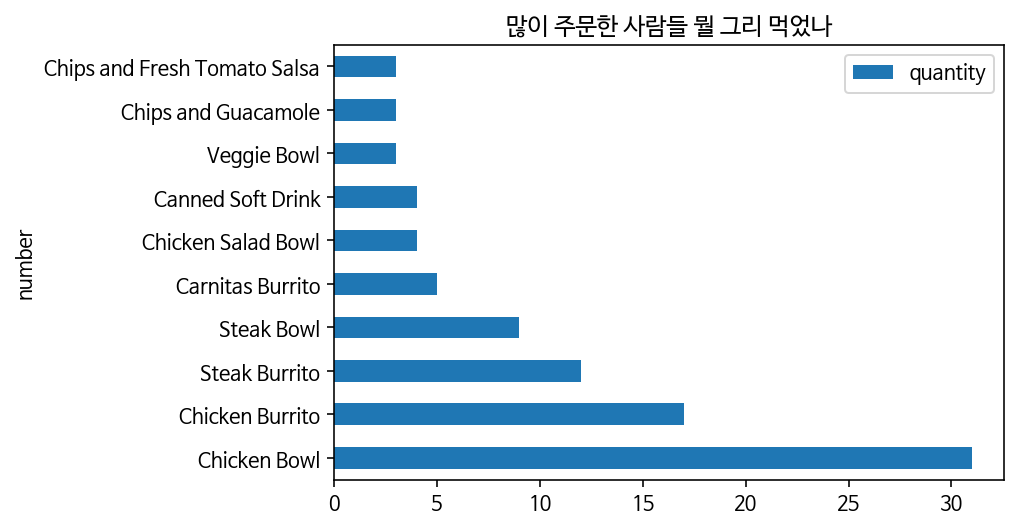

In [ ]:
ax2 = re_top_10[:10].plot.barh(y = 'quantity', xlabel = 'number', ylabel = 'menu',
                            title = '많이 주문한 사람들 뭘 그리 먹었나')

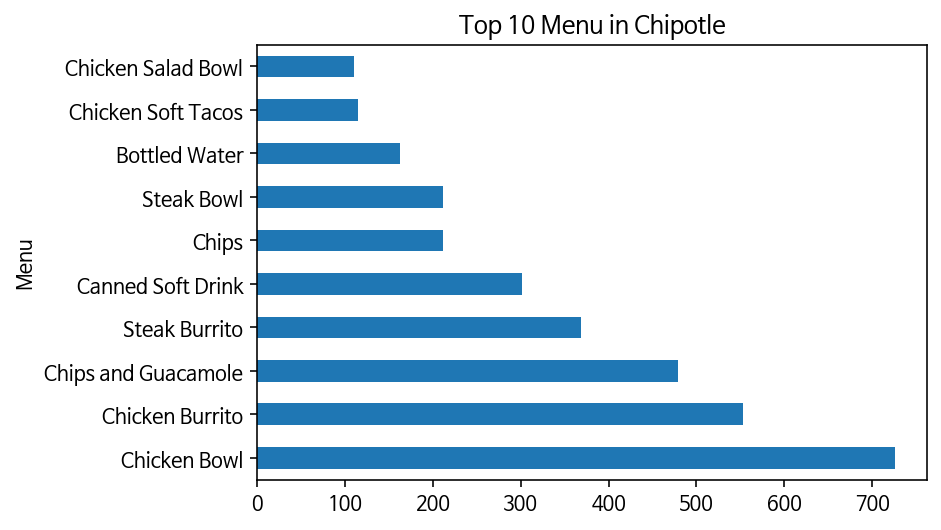

In [ ]:
# visualization: top 10 menu
x = df['item_name'].value_counts()[:10]

ax = x.plot.barh(x='item_name', y='quantity',
                title = 'Top 10 Menu in Chipotle', 
                ylabel = 'Quantity', xlabel = 'Menu')

In [ ]:
top2 = df.query('order_id =="1"')
top2 = top2.groupby('item_name').count().sort_values('quantity', ascending = False)
top2

,order_id,quantity,choice_description,item_price
item_name,,,,
Chips and Fresh Tomato Salsa,1,1,0,1
Chips and Tomatillo Green Chili Salsa,1,1,0,1
Izze,1,1,1,1
Nantucket Nectar,1,1,1,1


In [ ]:
df.head(10)

## 굳이굳이..


In [ ]:
df_in = df.set_index(['order_id'])
df_in

In [ ]:
p = df_in.filter(like='926', axis=0)
top1 = p.groupby('item_name').count().sort_values('quantity', ascending = False)
top1

,quantity,choice_description,item_price
item_name,,,
Chicken Bowl,9,9,9
Steak Bowl,5,5,5
Chicken Burrito,4,4,4
Steak Burrito,2,2,2
Barbacoa Burrito,1,1,1
Chicken Salad Bowl,1,1,1
Veggie Bowl,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


## visualization

In [ ]:
# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


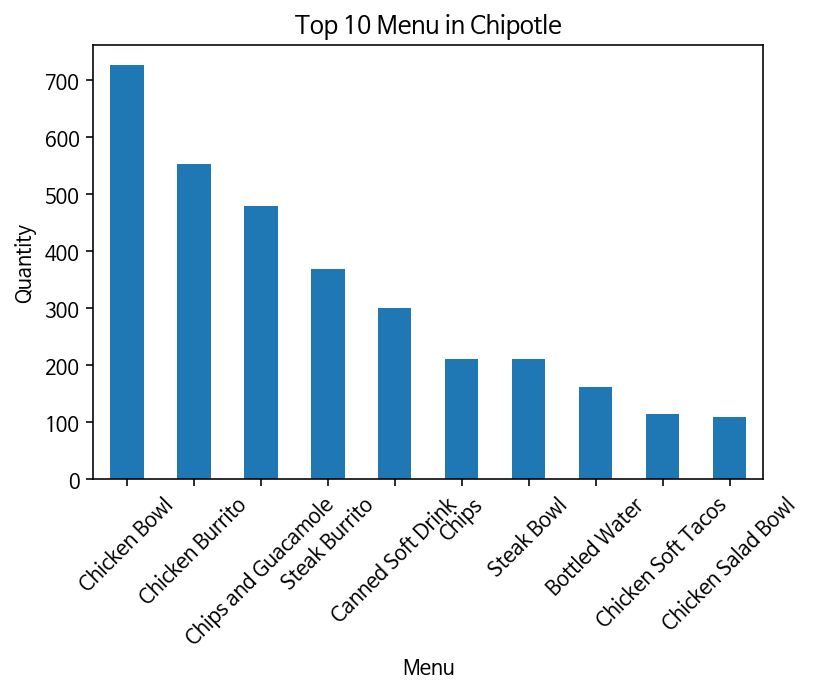

In [ ]:
# visualization: top 10 menu
x = df['item_name'].value_counts()[:10]

ax = x.plot.bar(x='item_name', y='quantity', rot=45,
                title = 'Top 10 Menu in Chipotle', 
                ylabel = 'Quantity', xlabel = 'Menu')

In [ ]:
x

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64